In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
red_wine = pd.read_csv('winequality-red.csv')
red_wine.head()
red_wine.shape

(1599, 12)

In [3]:
input_shape=[11]

In [4]:
from tensorflow import keras
from tensorflow.keras import layers
model =  keras.Sequential([layers.Dense(units=1, input_shape=[11])])

In [5]:
w, b = model.weights
print("Weightsn{}nnBiasn{}".format(w, b))

Weightsn<tf.Variable 'dense/kernel:0' shape=(11, 1) dtype=float32, numpy=
array([[ 0.20378184],
       [ 0.1414386 ],
       [-0.2884795 ],
       [ 0.08310229],
       [ 0.48820108],
       [ 0.4176584 ],
       [ 0.340571  ],
       [-0.40887618],
       [ 0.09132951],
       [ 0.3994307 ],
       [-0.6422746 ]], dtype=float32)>nnBiasn<tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>


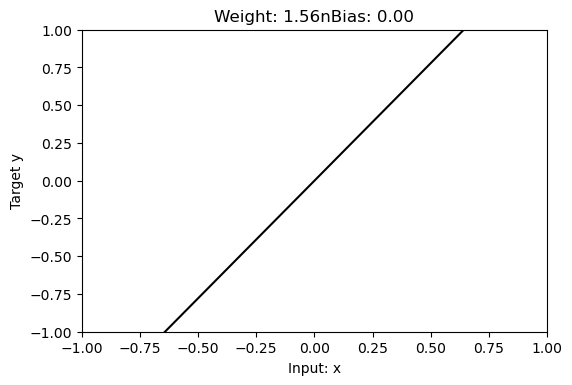

In [6]:
import tensorflow as tf
import matplotlib.pyplot as plt
model = keras.Sequential([
    layers.Dense(1, input_shape=[1]),
])
x = tf.linspace(-1.0, 1.0, 100)
y = model.predict(x)
plt.figure(dpi=100)
plt.plot(x, y, 'k')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel("Input: x")
plt.ylabel("Target y")
w, b = model.weights 
plt.title("Weight: {:0.2f}nBias: {:0.2f}".format(w[0][0], b[0]))
plt.show()

In [7]:
model = keras.Sequential([layers.Dense(units=512,activation='relu',input_shape=[11]),layers.Dense(units=512,activation='relu'),layers.Dense(units=512,activation='relu'),layers.Dense(units=1)])

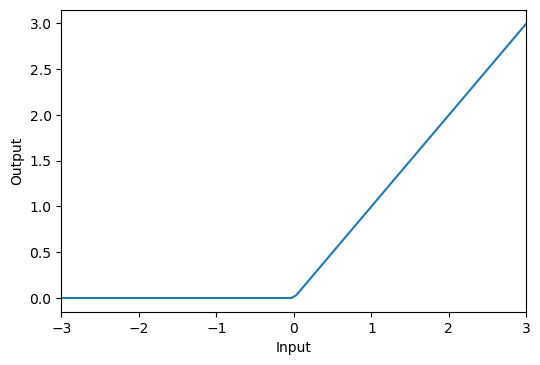

In [8]:
import tensorflow as tf
import matplotlib.pyplot as plt
activation_layer = layers.Activation('relu')
x = tf.linspace(-3.0, 3.0, 100)
y = activation_layer(x) 
plt.figure(dpi=100)
plt.plot(x, y)
plt.xlim(-3, 3)
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()

In [9]:
df_train = red_wine.sample(frac=0.7, random_state=5)
df_valid = red_wine.drop(df_train.index)
display(df_train.head(4))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
236,7.2,0.63,0.00,1.9,0.097,14.0,38.0,0.99675,3.37,0.58,9.0,6
833,11.6,0.47,0.44,1.6,0.147,36.0,51.0,0.99836,3.38,0.86,9.9,4
424,7.7,0.96,0.20,2.0,0.047,15.0,60.0,0.99550,3.36,0.44,10.9,5
982,7.3,0.52,0.32,2.1,0.070,51.0,70.0,0.99418,3.34,0.82,12.9,6


In [10]:
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)

In [11]:
X_train = df_train.drop('quality', axis=1)

X_valid = df_valid.drop('quality', axis=1)

y_train = df_train['quality']

y_valid = df_valid['quality']

In [12]:
X_train.shape

(1119, 11)

In [14]:

model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[11]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])

In [63]:
model.compile(
    optimizer='adam',
    loss='mae',
    metrics=['accuracy']
)

In [68]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=30,
)

Epoch 1/30
5/5 [==============================] - 0s 49ms/step - loss: 0.0820 - accuracy: 0.0197 - val_loss: 0.0940 - val_accuracy: 0.0104
Epoch 2/30
5/5 [==============================] - 0s 39ms/step - loss: 0.0813 - accuracy: 0.0197 - val_loss: 0.0930 - val_accuracy: 0.0104
Epoch 3/30
5/5 [==============================] - 0s 32ms/step - loss: 0.0817 - accuracy: 0.0206 - val_loss: 0.0937 - val_accuracy: 0.0104
Epoch 4/30
5/5 [==============================] - 0s 35ms/step - loss: 0.0814 - accuracy: 0.0206 - val_loss: 0.0947 - val_accuracy: 0.0104
Epoch 5/30
5/5 [==============================] - 0s 34ms/step - loss: 0.0824 - accuracy: 0.0206 - val_loss: 0.0939 - val_accuracy: 0.0104
Epoch 6/30
5/5 [==============================] - 0s 35ms/step - loss: 0.0812 - accuracy: 0.0197 - val_loss: 0.0971 - val_accuracy: 0.0104
Epoch 7/30
5/5 [==============================] - 0s 33ms/step - loss: 0.0817 - accuracy: 0.0197 - val_loss: 0.0932 - val_accuracy: 0.0104
Epoch 8/30
5/5 [===========

In [69]:
df = pd.DataFrame(history.history)
df['Epochs'] = history.epoch

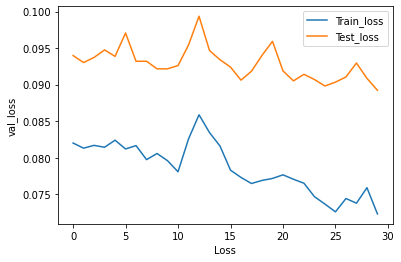

In [70]:
plt.plot(df['Epochs'],df['loss'],label='Train_loss')
plt.plot(df['Epochs'],df['val_loss'],label='Test_loss')
plt.xlabel('Loss')
plt.ylabel('val_loss')  
plt.legend()
plt.show()

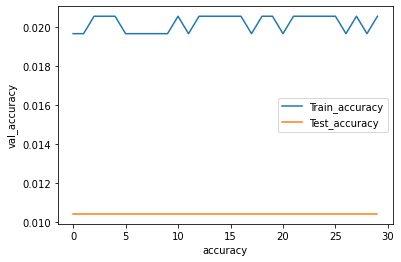

In [71]:
plt.plot(df['Epochs'],df['accuracy'],label='Train_accuracy')
plt.plot(df['Epochs'],df['val_accuracy'],label='Test_accuracy')
plt.xlabel('accuracy')
plt.ylabel('val_accuracy')
plt.legend()
plt.show()

NameError: name 'xtest' is not defined

In [72]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true, y_pred)

NameError: name 'y_true' is not defined